# Predicting Flight Arrival Delays
### By Nick Palacio

# Intro
## Problem Statement
The logistics of predicting airline flight delays can be incredibly complex. It can depend on many different variables: airline company, time of year, departure time, etc. This is a worthwhile problem to solve for airlines because if a flight will be arriving late it could have a chain reaction on other flights that are using the same airplane or crew which can be costly. This is a worthwhile problem to solve for passengers so that if a flight is going to be late they can plan accordingly. The sooner both of these stakeholders know about a delayed flight the better.

## Existing Techniques
Several machine learning methods have been employed to solve this very problem. A paper published in 2016 (found here https://ieeexplore.ieee.org/abstract/document/7777956) talks about using decision trees, random forests, and the AdaBoost algorithm to try and predict flight delays. However, they turned it into a binary classification problem to simply say if a flight would be late or not. Another paper also published in 2016 (found here https://ieeexplore.ieee.org/abstract/document/7778092) used Deep Learning to try and predict flight delays.

## My Approach
My approach to this problem will involve comparing several different machine learning algorithms on a dataset of flight and weather information from Microsoft’s Azure Machine Learning Studio. The algorithm’s I will compare are Linear Regression and Decision Trees. Originally, I wanted to use the Support Vector Machine algorithm but I ran into some computational limits due to the size of the datasets. I will also compare the model performances with and without an additional weather dataset that ties an airport to weather conditions at a point in time.

## Process
First I will load the flight dataset from a CSV file. Then I will clean it up and take a look at a few features that might be useful in our models. After this I will build the machine learning models using the algorithms described above. Then I will compare the models using several error metrics described later on. Once I have done all of this without the weather dataset I will load that from a CSV file, clean it and join it to our original flight dataset. Using this new joined dataset I will run the same algorithms and again compare their error metrics. Then I will compare the error metrics of the algorithms with and without the weather dataset to see how much of a difference it made.

## Tools
In order to conduct this experiment I will use the Pandas python library and the NumPy python library for importing/cleaning/analyzing data. I will use the SciKit-Learn python library for creating the machine learning models. I have also written a small utility (utils.py) library to reduce duplicate code throughout this notebook.

## Constants

In [1]:
flightDataFile = './Flight Delays Data.csv'
weatherDataFile = './Weather Data.csv'
trainingDataPercent = .70

In [2]:
import utils
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import tree

## Without Weather Data

### Load Flight Data

In [3]:
flightData = pd.read_csv(flightDataFile)
flightData

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,4,19,5,DL,11433,13303,837,-3.0,0.0,1138,1.0,0.0,0.0
1,2013,4,19,5,DL,14869,12478,1705,0.0,0.0,2336,-8.0,0.0,0.0
2,2013,4,19,5,DL,14057,14869,600,-4.0,0.0,851,-15.0,0.0,0.0
3,2013,4,19,5,DL,15016,11433,1630,28.0,1.0,1903,24.0,1.0,0.0
4,2013,4,19,5,DL,11193,12892,1615,-6.0,0.0,1805,-11.0,0.0,0.0
5,2013,4,19,5,DL,10397,15016,1726,-1.0,0.0,1818,-19.0,0.0,0.0
6,2013,4,19,5,DL,15016,10397,1900,0.0,0.0,2133,-1.0,0.0,0.0
7,2013,4,19,5,DL,10397,14869,2145,15.0,1.0,2356,24.0,1.0,0.0
8,2013,4,19,5,DL,10397,10423,2157,33.0,1.0,2333,34.0,1.0,0.0
9,2013,4,19,5,DL,11278,10397,1900,323.0,1.0,2055,322.0,1.0,0.0


Here we are loading the flight delays dataset from a CSV file. This dataset is a sample dataset from Microsoft. It contains flight delay data from the U.S. Department of Transportation. The data spans from April to October 2013. It was also filtered to only contain data from the 70 busiest airports in the continental U.S. It contains ~2.7 million records. Each record specifies the origin and destination airports, airline company as well as the date and time of the departure and arrival of the flight. The column we will be training our model to predict is 'ArrDelay' which says how many minutes late (or early) a flight was from arriving at its destination airport.

### Clean Flight Data

If we just tried to run our algorithms on this dataset right now we would run into a few problems. Probably the most time consuming part of the machine learning problem solving process is cleaning and analyzing the data. We will proceed with cleaning our data by performing the steps detailed below.

#### Missing Data

In [4]:
utils.FillInMissingNumericValues(flightData,'DepDelay',0)
utils.FillInMissingNumericValues(flightData,'ArrDelay',0)

Filled in 27444 missing values for DepDelay
Filled in 29033 missing values for ArrDelay


Two columns in our dataset have some missing data. 'DepDelay' says how many minutes late a flight was from departing its origin airport. 'ArrDelay' is our label we are trying to predict, how many minutes late a flight was. We will substitute 0 for any missing values in these columns.

We will do this by calling the utility library which in turn uses Pandas to fill in the missing values and print out how many there were.

#### Drop Cancelled Flights

In [5]:
flightData = flightData.loc[flightData['Cancelled'] == 0]
flightData

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,4,19,5,DL,11433,13303,837,-3.0,0.0,1138,1.0,0.0,0.0
1,2013,4,19,5,DL,14869,12478,1705,0.0,0.0,2336,-8.0,0.0,0.0
2,2013,4,19,5,DL,14057,14869,600,-4.0,0.0,851,-15.0,0.0,0.0
3,2013,4,19,5,DL,15016,11433,1630,28.0,1.0,1903,24.0,1.0,0.0
4,2013,4,19,5,DL,11193,12892,1615,-6.0,0.0,1805,-11.0,0.0,0.0
5,2013,4,19,5,DL,10397,15016,1726,-1.0,0.0,1818,-19.0,0.0,0.0
6,2013,4,19,5,DL,15016,10397,1900,0.0,0.0,2133,-1.0,0.0,0.0
7,2013,4,19,5,DL,10397,14869,2145,15.0,1.0,2356,24.0,1.0,0.0
8,2013,4,19,5,DL,10397,10423,2157,33.0,1.0,2333,34.0,1.0,0.0
9,2013,4,19,5,DL,11278,10397,1900,323.0,1.0,2055,322.0,1.0,0.0


There are some records in our flight dataset for flights that were cancelled. We want to drop these records because we are not predicting delays for cancelled flights. Also, almost all of the cancelled flight record are missing the label value ('ArrDelay'). This is probably due to the fact that they were cancelled, not delayed.

#### Duplicate Rows

In [6]:
utils.DropDuplicates(flightData,['Year','Month','DayofMonth','Carrier','OriginAirportID','DestAirportID','CRSDepTime','CRSArrTime'])

Deleted 16 duplicate rows


C:\Users\Nick\Documents\NickSchool\IntroToAI\Homework\Project\Work\utils.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.drop_duplicates(keep='first', subset=columns, inplace=True)


There are duplicate records in the flight dataset that we need to get rid of. Flight records are considered duplicated if they happened on the same day, departed at the same time and arrived at the same time from the same origin and destination airports.

We will drop these duplicates by calling the utility library which in turn uses Pandas to find any duplicates and use the first record it finds as the unique one. It will also print out how many it found.

#### Handle Cyclical Data

In [7]:
flightData['DayCos'] = np.cos(flightData.DayOfWeek*(2.*np.pi/7))
flightData['DaySin'] = np.sin(flightData.DayOfWeek*(2.*np.pi/7))
flightData['MonthCos'] = np.cos(flightData.Month*(2.*np.pi/12))
flightData['MonthSin'] = np.sin(flightData.Month*(2.*np.pi/12))

C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

The day of the week and month columns are an interesting case. One might think that we could treat these as categorical features but then our model would miss out on the relationship between the last value and the first value of these columns (they are right next to eachother). We want to capture the cyclical nature of these columns. One technique for this is shown above. We can create 2 new columns where we convert the values to sine and cosine values and together these columns capture this relationship.

#### Filter Columns

In [8]:
filteredFlightData = utils.FilterColumns(flightData, ['Year','DayofMonth','DayOfWeek','Carrier','OriginAirportID','DestAirportID','CRSDepTime','DepDelay','DaySin','DayCos','MonthSin','MonthCos','Month'])
filteredFlightData

,Year,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DaySin,DayCos,MonthSin,MonthCos,Month
0,2013,19,5,DL,11433,13303,837,-3.0,-0.974928,-0.222521,0.866025,-0.5,4
1,2013,19,5,DL,14869,12478,1705,0.0,-0.974928,-0.222521,0.866025,-0.5,4
2,2013,19,5,DL,14057,14869,600,-4.0,-0.974928,-0.222521,0.866025,-0.5,4
3,2013,19,5,DL,15016,11433,1630,28.0,-0.974928,-0.222521,0.866025,-0.5,4
4,2013,19,5,DL,11193,12892,1615,-6.0,-0.974928,-0.222521,0.866025,-0.5,4
5,2013,19,5,DL,10397,15016,1726,-1.0,-0.974928,-0.222521,0.866025,-0.5,4
6,2013,19,5,DL,15016,10397,1900,0.0,-0.974928,-0.222521,0.866025,-0.5,4
7,2013,19,5,DL,10397,14869,2145,15.0,-0.974928,-0.222521,0.866025,-0.5,4
8,2013,19,5,DL,10397,10423,2157,33.0,-0.974928,-0.222521,0.866025,-0.5,4
9,2013,19,5,DL,11278,10397,1900,323.0,-0.974928,-0.222521,0.866025,-0.5,4


Now we will filter out some columns from our dataset. We will drop 'DepDelay15', 'ArrDelay15' and 'Cancelled'.

'DepDelay15' is basically a boolean field that says whether or not the departure was delayed by at least 15 minutes. We want to drop this out because we already have the 'DepDelay' column which tells us exactly how long the departure was delayed.

'ArrDelay15' is another boolean field that says weather or not the flight was delayed by at least 15 minutes. Again, we do not want this because we already have 'ArrDelay', which is our label, and it tells us exactly how many minutes the flight was delayed.

'Cancelled' is another boolean field that says whether or not the flight was cancelled. We want to drop this column because we removed all rows for flights that were cancelled so in our remaining dataset this should be false for everything and it is not useful to have a feature in our model where every value is the same.

To drop these columns from our dataset we simply call the utility library which calls Pandas and filters out the columns.

#### Handle Categorical Data

In [9]:
pristineFlightData = pd.get_dummies(filteredFlightData,columns=['Carrier','OriginAirportID','DestAirportID'])
pristineFlightData

,Year,DayofMonth,DayOfWeek,CRSDepTime,DepDelay,DaySin,DayCos,MonthSin,MonthCos,Month,...,DestAirportID_14747,DestAirportID_14771,DestAirportID_14831,DestAirportID_14843,DestAirportID_14869,DestAirportID_14893,DestAirportID_14908,DestAirportID_15016,DestAirportID_15304,DestAirportID_15376
0,2013,19,5,837,-3.0,-0.974928,-0.222521,0.866025,-0.5,4,...,0,0,0,0,0,0,0,0,0,0
1,2013,19,5,1705,0.0,-0.974928,-0.222521,0.866025,-0.5,4,...,0,0,0,0,0,0,0,0,0,0
2,2013,19,5,600,-4.0,-0.974928,-0.222521,0.866025,-0.5,4,...,0,0,0,0,1,0,0,0,0,0
3,2013,19,5,1630,28.0,-0.974928,-0.222521,0.866025,-0.5,4,...,0,0,0,0,0,0,0,0,0,0
4,2013,19,5,1615,-6.0,-0.974928,-0.222521,0.866025,-0.5,4,...,0,0,0,0,0,0,0,0,0,0
5,2013,19,5,1726,-1.0,-0.974928,-0.222521,0.866025,-0.5,4,...,0,0,0,0,0,0,0,1,0,0
6,2013,19,5,1900,0.0,-0.974928,-0.222521,0.866025,-0.5,4,...,0,0,0,0,0,0,0,0,0,0
7,2013,19,5,2145,15.0,-0.974928,-0.222521,0.866025,-0.5,4,...,0,0,0,0,1,0,0,0,0,0
8,2013,19,5,2157,33.0,-0.974928,-0.222521,0.866025,-0.5,4,...,0,0,0,0,0,0,0,0,0,0
9,2013,19,5,1900,323.0,-0.974928,-0.222521,0.866025,-0.5,4,...,0,0,0,0,0,0,0,0,0,0


Machine learning models can only handle numeric values in the columns. You may have noticed that our flight dataset has some categorical features like 'Carrier', 'OriginAirportID' and 'DestAirportID'. While both the airport ID fields are numeric, we do not want our model to compare the different values as they are because it is really catergorical data, not a continuous value. We will need to convert these columns into numeric values that make sense for our model.

We can do this by 'flattening out' the data in these columns. For instance if we have 3 distinct Carriers we can put 3 boolean columns on our dataset that indicate which Carrier type each row is. So each row would have one of these columns as true (1) and the rest as false (0). These boolean values are numeric (1 or 0) and will work for the algorithms. Most of these features have more than 3 distinct values, however. This ends up adding a lot of columns to our dataset for these 3 categorical features which you can see above.

### Analyze Flight Data Features

Here we are going to take a look at a few features on our dataset. With any Machine Learning problem, it is always a good practice to spend time to analyze and understand the dataset. It is important to do this because developing a Machine Learning model is an iterative process where you experiment and continually try to improve the model and having a good understanding of the data is essential in that process.

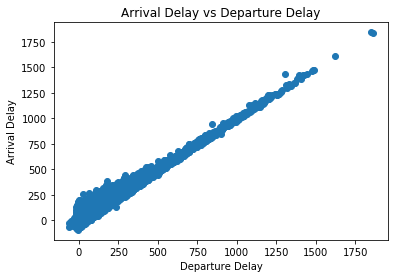

In [10]:
arrDelayData = flightData['ArrDelay']
depDelayData = flightData['DepDelay']
plt.scatter(depDelayData, arrDelayData)
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')
plt.title('Arrival Delay vs Departure Delay')
plt.show()

Here is a scatter plot of the Arrival Delay compared to the Departure Delay, both continuous values. This plot shows that the Departure Delay feature is highly correlated to the Arrival Delay feature. This probably comes at no surprise. What this plot really shows is that Departure Delay will probably be a very valuable feature for our models.

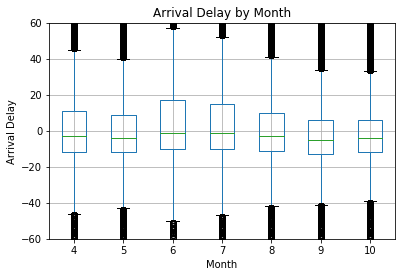

In [11]:
ax = flightData.boxplot('ArrDelay',by='Month',return_type=None)
ax.set_ylim(-60,60)
plt.axes(ax)
plt.ylabel('Arrival Delay')
plt.xlabel('Month')
plt.title('Arrival Delay by Month')
plt.suptitle('')
plt.show()

Here is a box plot of Arrival Delay compared to Month, a categorical feature. I have set the y-axis limits to exclude many of the outliers because they distored the view of the boxes that we are most interested in. We want to see if there is any correlation between the month of the flight and how delayed it was. This plot shows minimal correlation between the month of the flight and our label, Arrival Delay.

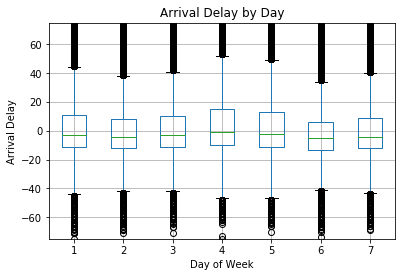

In [12]:
ax = flightData.boxplot('ArrDelay',by='DayOfWeek',return_type=None)
ax.set_ylim(-75,75)
plt.axes(ax)
plt.ylabel('Arrival Delay')
plt.xlabel('Day of Week')
plt.title('Arrival Delay by Day')
plt.suptitle('')
plt.show()

Here is another box plot with Arrival Delay compared with the day of the week. I again set the y-axis limits to make our interpretation more meaningful. This plot also shows a minimal relationship between the day of the week and how much the flight was delayed.

### Run Algorithms

Now that we have prepared and analyzed our data we are ready to start building some Machine Learning models.

In [13]:
mask = np.random.rand(len(pristineFlightData)) < trainingDataPercent
trainingDataX = pristineFlightData[mask]
testingDataX = pristineFlightData[~mask]
labelData = flightData.filter(items=['ArrDelay'])
trainingLabelData = labelData[mask]
testingLabelData = labelData[~mask]

Here we are splitting up our dataset into a training dataset and a testing dataset. Our training set will be used to train our models. Our testing dataset will be used to evaluate our models and see how well they can predict values.

In [14]:
comparisonDict = {
    'MeanAbsErr': [],
    'MeanSquErr': [],
    'RootMeanSquErr': []
}

We will evaluate our models using 3 error metrics
- Mean Absolute Error (MAE): MAE is the average of the absolute value of all of our residuals.
- Mean Squared Error (MSE): MSE is the average of the squared values of all of our residuals. One thing to point out with this metric is that records with large errors (typically outliers) have more of an influence on the average error due to the squaring.
- Root Mean Squared Error (RMSE): RMSE is square root of MSE. This is another metric that is more influenced by outliers that MSE but less so that MSE due to taking the square root of that value.

#### Linear Regression

Linear Regression is one of the more common Machine Learning algorithms used. It is fairly straightforward. Linear Regression tries to minimize an error function by adjusting the weights on all of the features it gets.

In [15]:
linRegrModel = LinearRegression()
linRegrModel.fit(trainingDataX,trainingLabelData)
predictedLRLabelData = linRegrModel.predict(testingDataX)

Here we are training the Linear Regression model and then having it predict our testing data so we can evaluate how well it did.

In [16]:
comparisonDict = utils.UpdateComparisonDict(comparisonDict, testingLabelData, predictedLRLabelData)
comparisonDict

{'MeanAbsErr': [8.826203505410852],
 'MeanSquErr': [163.52087358105226],
 'RootMeanSquErr': [12.787528048104225]}

Here we are using our utility library to calculate our 3 error metics and save them off for later. We use the utility library to calculate these which in turn uses another module in the SciKit-Learn Python library.

#### Decision Tree Regression

Decision Tree Regression uses a different approach that Linear Regression. As we learned in class, the Decision Tree algorithm will try to figure out what features to split on in order to get the best predicted results (minimize the error function).

In [17]:
dtModel = tree.DecisionTreeRegressor()
dtModel.fit(trainingDataX,trainingLabelData)
predictedDTLabelData = dtModel.predict(testingDataX)

Again we train our model and have it predict our testing dataset.

In [18]:
comparisonDict = utils.UpdateComparisonDict(comparisonDict, testingLabelData, predictedDTLabelData)
comparisonDict

{'MeanAbsErr': [8.826203505410852, 11.939592289058544],
 'MeanSquErr': [163.52087358105226, 296.9509729888709],
 'RootMeanSquErr': [12.787528048104225, 17.232265463045504]}

Again we calculate our error metrics and save them off.

#### Support Vector Machines

Originally I wanted to try to also but a model using the Support Vector Machine algorithm.

However, after some trials and research online I found out that my dataset would be too large for this algorithm which is computationally intensive. The calls to build the model were not terminating in a reasonable amount of time.

### Comparison of Algorithms Without Weather Data

Now we can take a look at a comparison of our models built using the different algorithms. We will do this by comparing the 3 error metrics we calculated for each model.

In [19]:
algorithms = ('LR', 'DT')
y_pos = np.arange(len(algorithms))

- LR: Linear Regression Algorithm
- DT: Decision Tree Algorithm

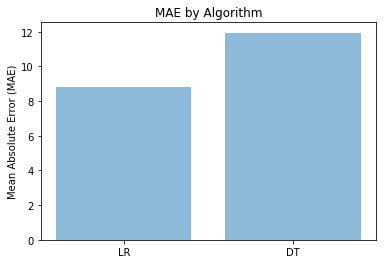

In [20]:
plt.bar(y_pos, comparisonDict['MeanAbsErr'], align='center', alpha=0.5)
plt.xticks(y_pos, algorithms)
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE by Algorithm')
plt.show()

In regards to MAE, Linear Regression appears to have built the better model with a value around 8.8 while the Decision Tree model came in around 11.9. These numbers tell us that the LR model is, on average, off by about 9 minutes when predicting the arrival delay while the DT model is off by about 12 minutes.

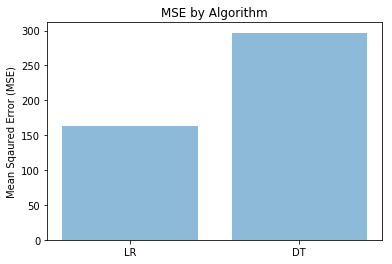

In [21]:
plt.bar(y_pos, comparisonDict['MeanSquErr'], align='center', alpha=0.5)
plt.xticks(y_pos, algorithms)
plt.ylabel('Mean Sqaured Error (MSE)')
plt.title('MSE by Algorithm')
plt.show()

Here we can see that the difference between these values is much larger than MAE, which is expected because MSE is the average of the squared errors.

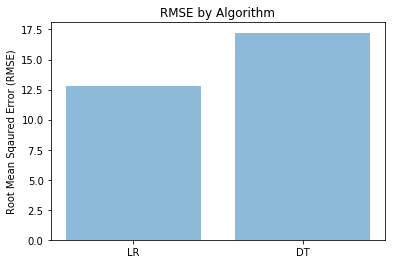

In [22]:
plt.bar(y_pos, comparisonDict['RootMeanSquErr'], align='center', alpha=0.5)
plt.xticks(y_pos, algorithms)
plt.ylabel('Root Mean Sqaured Error (RMSE)')
plt.title('RMSE by Algorithm')
plt.show()

Again we see that the LR model did significantly better than the DT model, with the difference here being slightly larger than it was with MAE, which again is expected.

## With Weather Data

Now we will introduce our weather dataset. This dataset is also a sample dataset from Microsoft. It contains hourly weather data collected from land by the National Oceanic and Atmosheric Administration (NOAA). The weather stations where the data was collected was mapped to airports, some of which are in our flight delays dataset.

### Load Weather Data

In [23]:
weatherData = pd.read_csv(weatherDataFile)

C:\Users\Nick\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (7,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Here we load the weather data from a CSV file. It contains ~400K records. Each record has the date and time the data was collected along with various weather metrics such as visibility, wet/dry bulb celcius (temperature), wind speed, etc.

### Clean Weather Data

Like most datasets, the weather data will require some preparation before we can use it in our model. It suffers from some of the same issues as the flight data.

#### Missing Data

In [24]:
colInfoDictArr = [
    {'name': 'Visibility','valuesToHandle': ['M'],'defaultValue': 0},
    {'name': 'DryBulbCelsius','valuesToHandle': ['M'],'defaultValue': 0},
    {'name': 'WetBulbCelsius','valuesToHandle': ['M'],'defaultValue': 0},
    {'name': 'DewPointCelsius','valuesToHandle': ['M'],'defaultValue': 0},
    {'name': 'RelativeHumidity','valuesToHandle': ['M'],'defaultValue': 0},
    {'name': 'WindSpeed','valuesToHandle': ['M','  '],'defaultValue': 0},
    {'name': 'StationPressure','valuesToHandle': ['M'],'defaultValue': 0}
]
processedWeatherData = utils.ConvertColumnsToNumeric(weatherData, colInfoDictArr)
processedWeatherData

,AirportID,Year,Month,Day,Time,TimeZone,SkyCondition,Visibility,WeatherType,DryBulbFarenheit,...,WindSpeed,WindDirection,ValueForWindCharacter,StationPressure,PressureTendency,PressureChange,SeaLevelPressure,RecordType,HourlyPrecip,Altimeter
0,14843,2013,4,1,56,-4,FEW018 SCT044 BKN070,10.0,-RA,76,...,13.0,080,,30.06,,,30.06,AA,T,30.07
1,14843,2013,4,1,156,-4,FEW037 SCT070,10.0,,76,...,10.0,090,,30.05,6,017,30.05,AA,,30.06
2,14843,2013,4,1,256,-4,FEW037 SCT070,10.0,,76,...,9.0,100,,30.03,,,30.03,AA,,30.04
3,14843,2013,4,1,356,-4,FEW025 SCT070,10.0,,76,...,9.0,100,,30.02,,,30.03,AA,,30.03
4,14843,2013,4,1,456,-4,FEW025,10.0,,76,...,7.0,110,,30.03,5,004,30.04,AA,,30.04
5,14843,2013,4,1,556,-4,FEW025 SCT080,10.0,,76,...,7.0,100,,30.04,,,30.05,AA,,30.05
6,14843,2013,4,1,656,-4,FEW028 BKN080,10.0,,77,...,9.0,110,,30.07,,,30.07,AA,,30.08
7,14843,2013,4,1,756,-4,FEW028 BKN080,10.0,,79,...,13.0,100,,30.09,3,020,30.10,AA,,30.10
8,14843,2013,4,1,856,-4,FEW030 BKN080,10.0,,82,...,14.0,100,21,30.11,,,30.11,AA,,30.12
9,14843,2013,4,1,956,-4,SCT035 BKN090,10.0,,83,...,16.0,090,23,30.11,,,30.12,AA,,30.12


The weather dataset has some columns with missing values as well as some incorrect values that we need to handle. Here we fill in those missing values, some of which are labeled with an 'M' and set those to 0.

We do this through the utility library which uses Pandas to convert the values that indicate data is actually missing to 0 along with any actual missing values.

In [25]:
processedWeatherData = utils.UpdateWeatherDataTimeFields(weatherData)

Our weather data has date and time information with it. However, it has a separate time zone feature that needs to be taken into account in order to align the date and time values with the date and time values in the flight dataset.

In this step we also use our time field to calculate an hour field that we will use to join this data back to the flight data. We simply round down our time field to the nearest hour in order to do this.

In order to do this we call our utility library which creates a Python date-time object and adjusts to the time zone for that record and then updates each of our date and time fields.

#### Filter Columns

In [26]:
processedWeatherData = utils.FilterColumns(processedWeatherData, ['AirportID','Year','Month','Day','Hour','TimeZone','Visibility','DryBulbCelsius','DewPointCelsius','RelativeHumidity','WindSpeed','StationPressure'])
processedWeatherData

,AirportID,Year,Month,Day,Hour,TimeZone,Visibility,DryBulbCelsius,DewPointCelsius,RelativeHumidity,WindSpeed,StationPressure
0,14843,2013,3,31,20,-4,10.0,24.4,22.8,90.0,13.0,30.06
1,14843,2013,3,31,21,-4,10.0,24.4,21.7,85.0,10.0,30.05
2,14843,2013,3,31,22,-4,10.0,24.4,21.7,85.0,9.0,30.03
3,14843,2013,3,31,23,-4,10.0,24.4,21.1,82.0,9.0,30.02
4,14843,2013,4,1,0,-4,10.0,24.4,21.1,82.0,7.0,30.03
5,14843,2013,4,1,1,-4,10.0,24.4,20.6,79.0,7.0,30.04
6,14843,2013,4,1,2,-4,10.0,25.0,20.0,74.0,9.0,30.07
7,14843,2013,4,1,3,-4,10.0,26.1,20.6,72.0,13.0,30.09
8,14843,2013,4,1,4,-4,10.0,27.8,20.6,65.0,14.0,30.11
9,14843,2013,4,1,5,-4,10.0,28.3,20.6,63.0,16.0,30.11


Here we drop out some columns from our weather dataset that we do not need. Some of these are because columns are highly correlated with other columns (dry vs wet bulb temperatures). Other columns have too much missing data or I could not find out what data they represented so I was not comfortable including them in my model for now (weather type, value for wind character).

#### Drop Duplicate Weather Records

In [27]:
utils.DropDuplicates(processedWeatherData, ['AirportID','Year','Month','Day','Hour'])

Deleted 67763 duplicate rows


Just like we did for the flight data we need to drop out some duplicate records. A record is considered a duplicate if it happened at the same date and time and airport as another record.

We use the same utility library as we did for the flight data.

### Join Flight Data with Weather Data

Now that we have the weather data prepared we can join it back to our flight data set.

In [28]:
filteredFlightData['CRSDepHour'] = flightData.apply(lambda row: utils.CalculateFlightDataHour(row),axis=1)

The first thing we need to do is convert the flight time field to an hour field. To do this we are simply rounding down to the nearest hour based on the departure time. We will use this hour field to join with the other hour field on our weather dataset.

In [29]:
mergedData = filteredFlightData.merge(processedWeatherData,how='left', left_on=['OriginAirportID','Year','Month','DayofMonth','CRSDepHour'], right_on=['AirportID','Year','Month','Day','Hour'])
mergedData

,Year,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DaySin,DayCos,...,AirportID,Day,Hour,TimeZone,Visibility,DryBulbCelsius,DewPointCelsius,RelativeHumidity,WindSpeed,StationPressure
0,2013,19,5,DL,11433,13303,837,-3.0,-0.974928,-0.222521,...,11433.0,19.0,8.0,-5.0,10.0,6.1,-1.1,60.0,34.0,28.89
1,2013,19,5,DL,14869,12478,1705,0.0,-0.974928,-0.222521,...,14869.0,19.0,17.0,-7.0,10.0,7.8,5.6,86.0,0.0,25.71
2,2013,19,5,DL,14057,14869,600,-4.0,-0.974928,-0.222521,...,14057.0,19.0,6.0,-8.0,10.0,13.9,9.4,75.0,9.0,30.09
3,2013,19,5,DL,15016,11433,1630,28.0,-0.974928,-0.222521,...,15016.0,19.0,16.0,-6.0,10.0,5.6,-3.9,51.0,7.0,29.31
4,2013,19,5,DL,11193,12892,1615,-6.0,-0.974928,-0.222521,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2013,19,5,DL,10397,15016,1726,-1.0,-0.974928,-0.222521,...,10397.0,19.0,17.0,-5.0,10.0,7.8,2.8,71.0,10.0,28.95
6,2013,19,5,DL,15016,10397,1900,0.0,-0.974928,-0.222521,...,15016.0,19.0,19.0,-6.0,10.0,3.9,-2.8,62.0,6.0,29.35
7,2013,19,5,DL,10397,14869,2145,15.0,-0.974928,-0.222521,...,10397.0,19.0,21.0,-5.0,10.0,5.6,0.0,68.0,13.0,28.97
8,2013,19,5,DL,10397,10423,2157,33.0,-0.974928,-0.222521,...,10397.0,19.0,21.0,-5.0,10.0,5.6,0.0,68.0,13.0,28.97
9,2013,19,5,DL,11278,10397,1900,323.0,-0.974928,-0.222521,...,11278.0,19.0,19.0,-5.0,10.0,11.7,7.2,74.0,8.0,29.75


Now we can join our weather data back to the flight data using the airport and date-time fields. We do a left-join here. This means that we keep all flight records even if they did not match to any weather records. This is important to note because later we will need to deal with the flight records that did not match to a weather record.

In [30]:
# TODO: analyze dataset with weather features

#### Drop Columns

In [31]:
mergedData = utils.FilterColumns(mergedData, ['Year', 'Month', 'MonthSin', 'MonthCos', 'DaySin', 'DayCos', 'Carrier','OriginAirportID', 'DestAirportID', 'CRSDepTime', 'DepDelay','CRSDepHour','ArrDelay','TimeZone','Visibility','DryBulbCelsius','DewPointCelsius','RelativeHumidity','WindSpeed','StationPressure'])
mergedData

,Year,Month,MonthSin,MonthCos,DaySin,DayCos,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,CRSDepHour,TimeZone,Visibility,DryBulbCelsius,DewPointCelsius,RelativeHumidity,WindSpeed,StationPressure
0,2013,4,0.866025,-0.5,-0.974928,-0.222521,DL,11433,13303,837,-3.0,8,-5.0,10.0,6.1,-1.1,60.0,34.0,28.89
1,2013,4,0.866025,-0.5,-0.974928,-0.222521,DL,14869,12478,1705,0.0,17,-7.0,10.0,7.8,5.6,86.0,0.0,25.71
2,2013,4,0.866025,-0.5,-0.974928,-0.222521,DL,14057,14869,600,-4.0,6,-8.0,10.0,13.9,9.4,75.0,9.0,30.09
3,2013,4,0.866025,-0.5,-0.974928,-0.222521,DL,15016,11433,1630,28.0,16,-6.0,10.0,5.6,-3.9,51.0,7.0,29.31
4,2013,4,0.866025,-0.5,-0.974928,-0.222521,DL,11193,12892,1615,-6.0,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2013,4,0.866025,-0.5,-0.974928,-0.222521,DL,10397,15016,1726,-1.0,17,-5.0,10.0,7.8,2.8,71.0,10.0,28.95
6,2013,4,0.866025,-0.5,-0.974928,-0.222521,DL,15016,10397,1900,0.0,19,-6.0,10.0,3.9,-2.8,62.0,6.0,29.35
7,2013,4,0.866025,-0.5,-0.974928,-0.222521,DL,10397,14869,2145,15.0,21,-5.0,10.0,5.6,0.0,68.0,13.0,28.97
8,2013,4,0.866025,-0.5,-0.974928,-0.222521,DL,10397,10423,2157,33.0,21,-5.0,10.0,5.6,0.0,68.0,13.0,28.97
9,2013,4,0.866025,-0.5,-0.974928,-0.222521,DL,11278,10397,1900,323.0,19,-5.0,10.0,11.7,7.2,74.0,8.0,29.75


After our join the merged dataset has the columns we joined on in both datasets. This is not necessary because the join implies that these corresponding columns would be equal so we can drop out one set of them which we do from the weather dataset.

#### Missing Data from Join 

In [33]:
utils.FillInMissingNumericValues(mergedData, 'TimeZone',0)
utils.FillInMissingNumericValues(mergedData, 'Visibility',0)
utils.FillInMissingNumericValues(mergedData, 'DryBulbCelsius',0)
utils.FillInMissingNumericValues(mergedData, 'DewPointCelsius',0)
utils.FillInMissingNumericValues(mergedData, 'RelativeHumidity',0)
utils.FillInMissingNumericValues(mergedData, 'WindSpeed',0)
utils.FillInMissingNumericValues(mergedData, 'StationPressure',0)
mergedData

Filled in 0 missing values for TimeZone
Filled in 0 missing values for Visibility
Filled in 0 missing values for DryBulbCelsius
Filled in 284228 missing values for DewPointCelsius
Filled in 284228 missing values for RelativeHumidity
Filled in 284228 missing values for WindSpeed
Filled in 284228 missing values for StationPressure


,Year,Month,MonthSin,MonthCos,DaySin,DayCos,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,CRSDepHour,TimeZone,Visibility,DryBulbCelsius,DewPointCelsius,RelativeHumidity,WindSpeed,StationPressure
0,2013,4,0.866025,-0.5,-0.974928,-0.222521,DL,11433,13303,837,-3.0,8,-5.0,10.0,6.1,-1.1,60.0,34.0,28.89
1,2013,4,0.866025,-0.5,-0.974928,-0.222521,DL,14869,12478,1705,0.0,17,-7.0,10.0,7.8,5.6,86.0,0.0,25.71
2,2013,4,0.866025,-0.5,-0.974928,-0.222521,DL,14057,14869,600,-4.0,6,-8.0,10.0,13.9,9.4,75.0,9.0,30.09
3,2013,4,0.866025,-0.5,-0.974928,-0.222521,DL,15016,11433,1630,28.0,16,-6.0,10.0,5.6,-3.9,51.0,7.0,29.31
4,2013,4,0.866025,-0.5,-0.974928,-0.222521,DL,11193,12892,1615,-6.0,16,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5,2013,4,0.866025,-0.5,-0.974928,-0.222521,DL,10397,15016,1726,-1.0,17,-5.0,10.0,7.8,2.8,71.0,10.0,28.95
6,2013,4,0.866025,-0.5,-0.974928,-0.222521,DL,15016,10397,1900,0.0,19,-6.0,10.0,3.9,-2.8,62.0,6.0,29.35
7,2013,4,0.866025,-0.5,-0.974928,-0.222521,DL,10397,14869,2145,15.0,21,-5.0,10.0,5.6,0.0,68.0,13.0,28.97
8,2013,4,0.866025,-0.5,-0.974928,-0.222521,DL,10397,10423,2157,33.0,21,-5.0,10.0,5.6,0.0,68.0,13.0,28.97
9,2013,4,0.866025,-0.5,-0.974928,-0.222521,DL,11278,10397,1900,323.0,19,-5.0,10.0,11.7,7.2,74.0,8.0,29.75


Since we did a left join the flight records that did not match to any weather record are missing data for the weather columns we added. We will fill in all those missing values with 0s.

#### Handle Categorical Data

In [34]:
mergedData = pd.get_dummies(mergedData,columns=['Carrier','OriginAirportID','DestAirportID','TimeZone'])
mergedData

,Year,Month,MonthSin,MonthCos,DaySin,DayCos,CRSDepTime,DepDelay,CRSDepHour,Visibility,...,DestAirportID_15304,DestAirportID_15376,TimeZone_-10.0,TimeZone_-9.0,TimeZone_-8.0,TimeZone_-7.0,TimeZone_-6.0,TimeZone_-5.0,TimeZone_-4.0,TimeZone_0.0
0,2013,4,0.866025,-0.5,-0.974928,-0.222521,837,-3.0,8,10.0,...,0,0,0,0,0,0,0,1,0,0
1,2013,4,0.866025,-0.5,-0.974928,-0.222521,1705,0.0,17,10.0,...,0,0,0,0,0,1,0,0,0,0
2,2013,4,0.866025,-0.5,-0.974928,-0.222521,600,-4.0,6,10.0,...,0,0,0,0,1,0,0,0,0,0
3,2013,4,0.866025,-0.5,-0.974928,-0.222521,1630,28.0,16,10.0,...,0,0,0,0,0,0,1,0,0,0
4,2013,4,0.866025,-0.5,-0.974928,-0.222521,1615,-6.0,16,0.0,...,0,0,0,0,0,0,0,0,0,1
5,2013,4,0.866025,-0.5,-0.974928,-0.222521,1726,-1.0,17,10.0,...,0,0,0,0,0,0,0,1,0,0
6,2013,4,0.866025,-0.5,-0.974928,-0.222521,1900,0.0,19,10.0,...,0,0,0,0,0,0,1,0,0,0
7,2013,4,0.866025,-0.5,-0.974928,-0.222521,2145,15.0,21,10.0,...,0,0,0,0,0,0,0,1,0,0
8,2013,4,0.866025,-0.5,-0.974928,-0.222521,2157,33.0,21,10.0,...,0,0,0,0,0,0,0,1,0,0
9,2013,4,0.866025,-0.5,-0.974928,-0.222521,1900,323.0,19,10.0,...,0,0,0,0,0,0,0,1,0,0


We need to handle categorical data in the same way that we did before.

### Run Algorithms With Weather Data

Now that we have prepared our merged dataset we are ready to re run our algorithms.

In [35]:
trainingDataXWW = mergedData[mask]
testingDataXWW = mergedData[~mask]
labelDataWW = flightData.filter(items=['ArrDelay'])
trainingLabelDataWW = labelDataWW[mask]
testingLabelDataWW = labelDataWW[~mask]

We will use the exact same random data split that we did for our run without the weather dataset.

In [36]:
comparisonDictWW = {
    'MeanAbsErr': [],
    'MeanSquErr': [],
    'RootMeanSquErr': []
}

#### Linear Regression With Weather Data

In [37]:
linRegrModelWithWeather = LinearRegression()
linRegrModelWithWeather.fit(trainingDataXWW,trainingLabelDataWW)
predictedLRWWLabelData = linRegrModelWithWeather.predict(testingDataXWW)

In [38]:
comparisonDictWW = utils.UpdateComparisonDict(comparisonDictWW, testingLabelDataWW, predictedLRWWLabelData)
comparisonDictWW

{'MeanAbsErr': [8.826124853265311],
 'MeanSquErr': [162.8989363974713],
 'RootMeanSquErr': [12.763186764968665]}

#### Decision Tree Regression With Weather Data

In [39]:
dtModelWithWeather = tree.DecisionTreeRegressor()
dtModelWithWeather.fit(trainingDataXWW,trainingLabelDataWW)
predictedDTWWLabelData = dtModelWithWeather.predict(testingDataXWW)

In [40]:
comparisonDictWW = utils.UpdateComparisonDict(comparisonDictWW, testingLabelDataWW, predictedDTWWLabelData)
comparisonDictWW

{'MeanAbsErr': [8.826124853265311, 12.187612308517078],
 'MeanSquErr': [162.8989363974713, 305.74737900256804],
 'RootMeanSquErr': [12.763186764968665, 17.485633503038088]}

#### Comparison of Algorithms With Weather Data

Now we will look at a comparison of the models from different algorithms with the weather dataset

In [41]:
algorithms = ('LRWW', 'DTWW')
y_pos = np.arange(len(algorithms))

Text(0.5,1,'MAE by Algorithm')

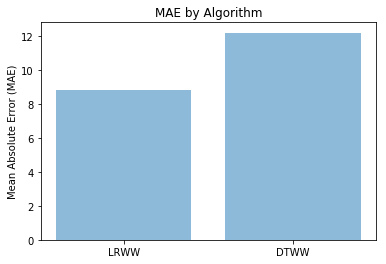

In [42]:
plt.bar(y_pos, comparisonDictWW['MeanAbsErr'], align='center', alpha=0.5)
plt.xticks(y_pos, algorithms)
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE by Algorithm')

Text(0.5,1,'MSE by Algorithm')

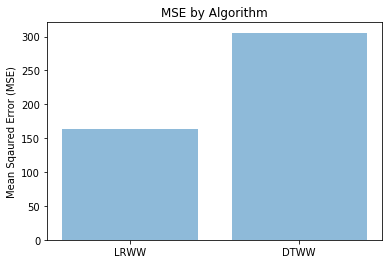

In [43]:
plt.bar(y_pos, comparisonDictWW['MeanSquErr'], align='center', alpha=0.5)
plt.xticks(y_pos, algorithms)
plt.ylabel('Mean Sqaured Error (MSE)')
plt.title('MSE by Algorithm')

Text(0.5,1,'RMSE by Algorithm')

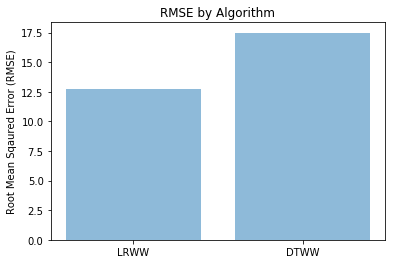

In [44]:
plt.bar(y_pos, comparisonDictWW['RootMeanSquErr'], align='center', alpha=0.5)
plt.xticks(y_pos, algorithms)
plt.ylabel('Root Mean Sqaured Error (RMSE)')
plt.title('RMSE by Algorithm')

Overall, we see very similar results as the run without the weather dataset. The Linear Regression model outperforms the Decision Tree model with very similar numbers for MAE, MSE and RMSE.

#### Comparison of Models With and Without Weather Data

Now we can take a look at how much of a difference adding the weather dataset made by comparing models built using the same algorithm with and without the weather dataset.

Text(0.5,1,'MAE With and Without Weather')

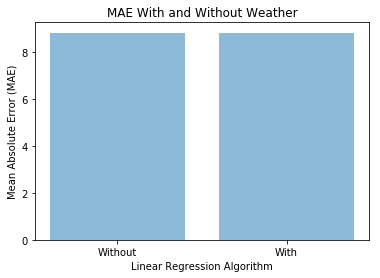

In [45]:
plt.bar(y_pos, [comparisonDict['MeanAbsErr'][0],comparisonDictWW['MeanAbsErr'][0]], align='center', alpha=0.5)
plt.xticks(y_pos, ('Without', 'With'))
plt.ylabel('Mean Absolute Error (MAE)')
plt.xlabel('Linear Regression Algorithm')
plt.title('MAE With and Without Weather')

Text(0.5,1,'MSE With and Without Weather')

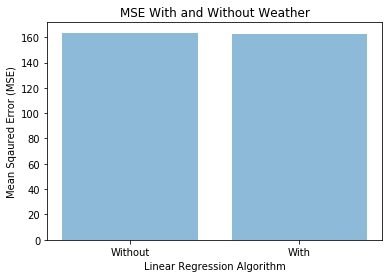

In [46]:
plt.bar(y_pos, [comparisonDict['MeanSquErr'][0],comparisonDictWW['MeanSquErr'][0]], align='center', alpha=0.5)
plt.xticks(y_pos, ('Without', 'With'))
plt.ylabel('Mean Sqaured Error (MSE)')
plt.xlabel('Linear Regression Algorithm')
plt.title('MSE With and Without Weather')

Text(0.5,1,'RMSE With and Without Weather')

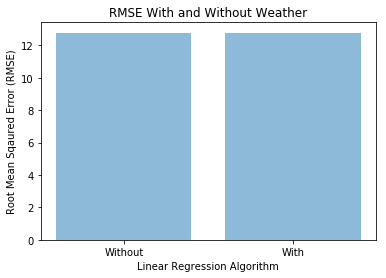

In [47]:
plt.bar(y_pos, [comparisonDict['RootMeanSquErr'][0],comparisonDictWW['RootMeanSquErr'][0]], align='center', alpha=0.5)
plt.xticks(y_pos, ('Without', 'With'))
plt.ylabel('Root Mean Sqaured Error (RMSE)')
plt.xlabel('Linear Regression Algorithm')
plt.title('RMSE With and Without Weather')

We can see that adding the weather data did not make a significant improvement in our linear regression model.

Text(0.5,1,'MAE With and Without Weather')

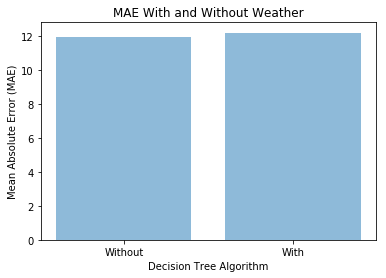

In [48]:
plt.bar(y_pos, [comparisonDict['MeanAbsErr'][1],comparisonDictWW['MeanAbsErr'][1]], align='center', alpha=0.5)
plt.xticks(y_pos, ('Without', 'With'))
plt.ylabel('Mean Absolute Error (MAE)')
plt.xlabel('Decision Tree Algorithm')
plt.title('MAE With and Without Weather')

Text(0.5,1,'MSE With and Without Weather')

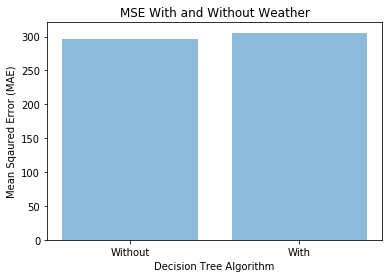

In [49]:
plt.bar(y_pos, [comparisonDict['MeanSquErr'][1],comparisonDictWW['MeanSquErr'][1]], align='center', alpha=0.5)
plt.xticks(y_pos, ('Without', 'With'))
plt.ylabel('Mean Sqaured Error (MAE)')
plt.xlabel('Decision Tree Algorithm')
plt.title('MSE With and Without Weather')

Text(0.5,1,'RMSE With and Without Weather')

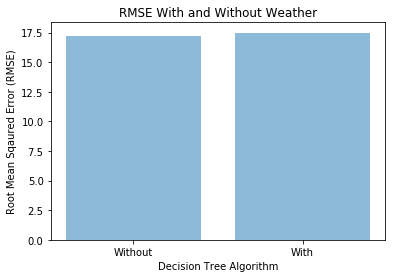

In [50]:
plt.bar(y_pos, [comparisonDict['RootMeanSquErr'][1],comparisonDictWW['RootMeanSquErr'][1]], align='center', alpha=0.5)
plt.xticks(y_pos, ('Without', 'With'))
plt.ylabel('Root Mean Sqaured Error (RMSE)')
plt.xlabel('Decision Tree Algorithm')
plt.title('RMSE With and Without Weather')

Again, we see very similar results where adding the weather data did not make an impact on our Decision Tree model.

Would like to do next
- analyze more features
- see how features are being weighted
- normalize numeric features
- try different algorithms
- look at more error metrics (AUC)
- if this was for enterprise (load into database, use SQL to join/clean, set up API for interfacing with model: maintaining, predicting)